In [1]:
# Project 1 Team 3
# Set Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

archive_path = "archive/MoviesOnStreamingPlatforms.csv"
ticket_sales_path = "TicketSales/AnnualTicketSales.csv"
gross_path = "TicketSales/HighestGrossers.csv"
creative_types_path = "TicketSales/PopularCreativeTypes.csv"
top_distributors_path = "TicketSales/TopDistributors.csv"
top_genres_path = "TicketSales/TopGenres.csv"
top_gross_ratings_path = "TicketSales/TopGrossingRatings.csv"
top_gross_source_path = "TicketSales/TopGrossingSources.csv"
top_production_path = "TicketSales/TopProductionMethods.csv"
subscriber_count_path = "subscription/svod-subscriber-count.csv"
ticket_sold_path = "subscription/tickets-sold-at-box-offices.csv"
subscription_price_path = "subscription/svod-services-monthly-subscription-price.csv"
user_share_path = "subscription/svod-service-user-shares.csv"
hulu_subscribers = "subscription/hulus-paying-subscribers-copy.csv"
disney_subscribers = "subscription/disney-subscribers-count-copy.csv"
home_vs_theater_path = "subscription/adults-who-preferred-to-watch-films-in-a-theater-or-at-home.csv"
netflix_subscribers = "subscription/statistic_id250937_quarterly-netflix-paid-streaming-subscribers-in-the-us-and-canada-2013-2023-copy.csv"
alberto_hulus = "subscription/alberto-hulus.csv"
alberto_disney = "subscription/alberto-disney.csv"
alberto_netflix = "subscription/alberto-netflix.csv"
alberto_box_office = "subscription/alberto-box-office.csv"

df_archive = pd.read_csv(archive_path)
df_ticket_sales = pd.read_csv(ticket_sales_path)
df_gross = pd.read_csv(gross_path)
df_creative_types = pd.read_csv(creative_types_path)
df_top_distributors = pd.read_csv(top_distributors_path)
df_genres = pd.read_csv(top_genres_path)
df_ratings = pd.read_csv(top_gross_ratings_path)
df_source = pd.read_csv(top_gross_source_path)
df_production = pd.read_csv(top_production_path)
df_sub_count = pd.read_csv(subscriber_count_path)
df_ticket_sold = pd.read_csv(ticket_sold_path)
df_sub_price = pd.read_csv(subscription_price_path)
df_user_share = pd.read_csv(user_share_path)
df_hulu = pd.read_csv(hulu_subscribers)
df_disney = pd.read_csv(disney_subscribers)
df_home_vs_theater = pd.read_csv(home_vs_theater_path)
df_netflix = pd.read_csv(netflix_subscribers)
df_anetflix = pd.read_csv(alberto_netflix)
df_ahulus = pd.read_csv(alberto_hulus)
df_adisney = pd.read_csv(alberto_disney)
df_box_office = pd.read_csv(alberto_box_office)




In [2]:
# Merge Hulu, Disney, and Netflix Subs

In [3]:
left = pd.read_csv(alberto_hulus)
right = pd.read_csv(alberto_disney)
right2 = pd.read_csv(alberto_netflix)



result = pd.merge(left, right, on=["Year","Subs"], how="outer")

final_result = pd.merge(result, right2, on=["Year","Subs"], how="outer")

In [4]:
# Print Final Result & Send To CSV

In [5]:
print(final_result)

   Year    Subs
0  2018   20.00
1  2022  184.30
2  2022  583.80
3  2018  250.55
4  2022  295.55


In [6]:
final_result.to_csv('streaming_subs_totals.csv')

In [7]:
streaming_services_totals = "subscription/streaming_subs_totals.csv"


df_streaming_services_totals = pd.read_csv(streaming_services_totals)

In [8]:
# Merge DFs & Export to CSV to Edit

In [9]:
left1 = pd.read_csv(streaming_services_totals)
right1 = pd.read_csv(alberto_box_office)

result = pd.merge(left1, right1, on=["Year","Sales"], how="outer")

result.to_csv('sales_2018_2022.csv')

In [10]:
sales = "subscription/sales_2018_2022e.csv"
df_sales = pd.read_csv(sales)


df_sales

,Unnamed: 0,Year,Sales
0,0,2018,270.55
1,1,2022,1063.65
2,5,2018,1311.30
3,6,2022,812.79


Text(0, 0.5, 'Sales in Millions')

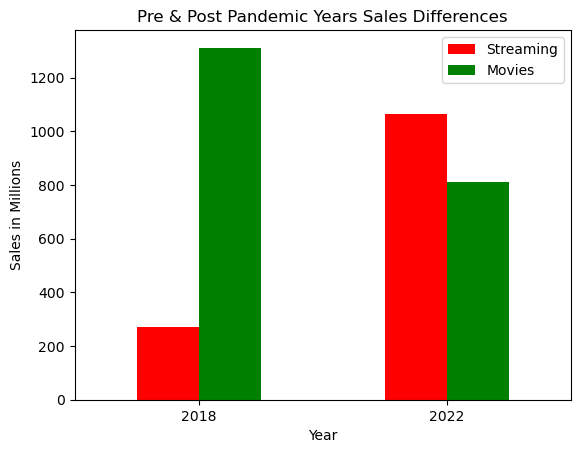

In [11]:
#Plot DF and Bar Chart
df_final = pd.DataFrame({'Year':[2018, 2022],'Streaming': [270.55, 1063.65], 'Movies':[1311.30, 812.79]})
#Plot Columns
df_final[['Year', 'Streaming', 'Movies']].plot(x='Year', color={"Streaming": "Red", "Movies": "Green"}, title="Pre & Post Pandemic Years Sales Differences", kind='bar')

plt.xticks(rotation='horizontal')
plt.ylabel("Sales in Millions")

In [12]:
#Offload to PNG